<a href="https://colab.research.google.com/github/mathildesoulie/QM2/blob/main/Statistics_%2B_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir data

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
finaldf= pd.read_csv("finaldf.csv")
finaldf


,Borough,total crimes,population,crimes per 1000 people,rdup crimes per 1000 people,wage,log crime rate,log income
0,Barking and Dagenham,"25,200","212,906",118.362094,118,12.88,2.073213,1.109916
1,Barnet,36762,"395,869",92.864054,93,16.00,1.967848,1.204120
2,Bexley,21357,"248,287",86.017391,86,15.84,1.934586,1.199755
3,Brent,36211,"329,771",109.806502,110,14.21,2.040628,1.152594
4,Bromley,29965,"332,336",90.164773,90,18.41,1.955037,1.265054
5,Camden,44826,"270,029",166.004392,166,19.17,2.220120,1.282622
6,Croydon,41668,"386,710",107.749994,108,15.51,2.032417,1.190612
7,Ealing,38609,"341,806",112.955887,113,14.57,2.052909,1.163460
8,Enfield,36393,"333,794",109.028323,109,13.67,2.037539,1.135769
9,Greenwich,34456,"287,942",119.662988,120,15.85,2.077960,1.200029


**1. Summary statistics**


In [ ]:

#Summary statistics:
finaldf.describe().round(1)

,crimes per 1000 people,wage,log crime rate,log income
count,32.0,32.0,32.0,32.0
mean,122.0,16.7,2.1,1.2
std,49.0,2.2,0.1,0.1
min,76.4,12.9,1.9,1.1
25%,92.2,15.3,2.0,1.2
50%,111.4,16.2,2.0,1.2
75%,134.6,18.6,2.1,1.3
max,348.5,21.1,2.5,1.3


In [ ]:
finaldf = finaldf.drop(columns=['rdup crimes per 1000 people'])
finaldf = finaldf.drop(columns=['log income'])
finaldf = finaldf.drop(columns=['log crime rate'])

In [ ]:
#Find the neighbourhood with the maximum and minimum number of crimes per 1000 population
finaldf.groupby(['Borough'])['crimes per 1000 people'].max()
finaldf[finaldf['crimes per 1000 people']==finaldf['crimes per 1000 people'].min()]

,Borough,total crimes,population,crimes per 1000 people,wage
25,Richmond upon Thames,15127,"198,019",76.391659,19.98


In [ ]:
finaldf[finaldf['crimes per 1000 people']==finaldf['crimes per 1000 people'].max()]

,Borough,total crimes,population,crimes per 1000 people,wage
31,Westminster,91070,"261,317",348.503924,19.14


In [ ]:
finaldf = finaldf.reset_index(drop=True)
finaldf[finaldf['population']==finaldf['population'].min()]

,Borough,total crimes,population,crimes per 1000 people,wage,log crime rate,log income
18,Kensington and Chelsea,28413,"156,129",181.984128,21.13,2.260034,1.324899



Observations:
- Residents of Westminster- the borough with the highest number of crimes per 1000 population- earn a higher income than 75% individuals in other neighbourhoods, with a real hourly wage of £19.14.
- Interestingly, inhabitants of Richmond upon Thames, which is the borough with least crimes per 1000 population also earn a higher income than 75% of London inhabitants.
From these primary statistics, we can hypothise that there is a small correlation betweeen high income and high number of crimes.
                                                                                                                                                      
- The number of crimes per 1000 population varies greatly from one borough to another, as the standard deviation is high (values are dispersed with a 49 unit range).  Westminster borough is the borough with most crimes and has 4 times more crimes than the borough with least crimes: Richmond upon Thames.




Thus our model  requires to delete values of the Westminster borough and can be brought to further investigation with linear regression.

2. Linear **Regression**

  A. Assumptions checking

We aim at finding the relation between the number of crimes per 1000 population and the income per London borough to determine whether income impacts number of crimes.

Our linear regression model is:
$$number\ of\ crimes \ per \ 1000 \ population= \beta_0 + \beta_1 \times  Income +\epsilon $$

In order to yield robust result, we must check whether 3 main assumptions are satisfied:
 - Independence: Our model is independant:  the measurements for income sample are not influenced by or related to the measurements for the number of crimes per 1000 population.
 - Multicolinearity: Our model is not multicolinear, as we only have one independant variable
 - Homoscedasticity:
 We test below the homoscedasticity of our model:


Text(87.72222222222221, 0.5, 'crimes per 1000 population per London borough')

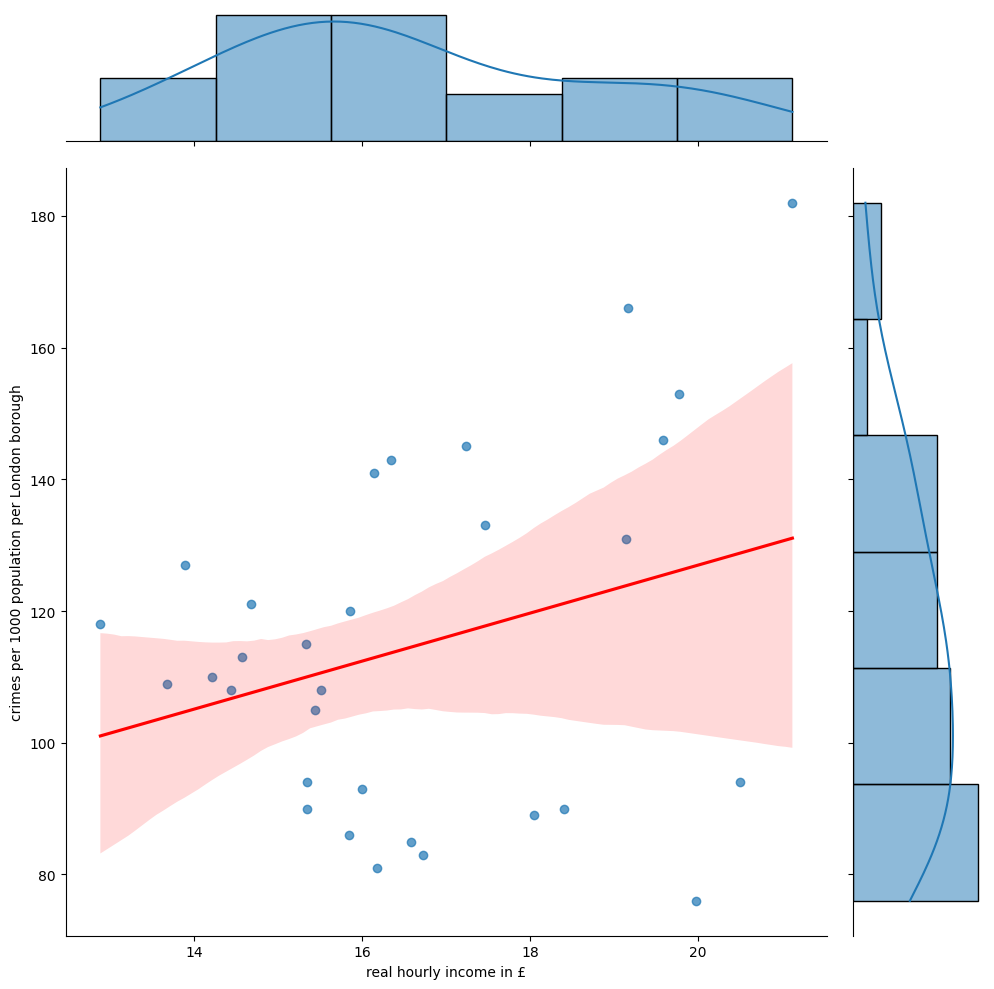

In [ ]:
finaldf.drop(31, inplace=True)#removing Westminster borough
#testing homoscedasticity
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(data=finaldf, # plot a scatterplot with a regression line and two histograms
                x='wage ', # set the x axis to be the income
                y='rdup crimes per 1000 people', # set the y axis to be crime rate
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.7), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('real hourly income in £') # add a label to the x axis
plt.ylabel('crimes per 1000 population per London borough') # add a label to the y axis

From the scatterplot, we observe that our data are dispersed and do not fit well the regression line, which might be a sign of heteroskedasticity. However, the distribution of crime rate seems normal and the distribution of real hourly wage looks also quite like the normal distribution.
To remedy to the potential heteroskedasticity detected, we can either change the estimator or change the model functional form, by taking the log of either or both independent and dependent variables (Williams, 2020).


  B. Solving Heteroskedasticity

We will compare the p-value of our model using different estimators, namely: Ordinary Least Squares and Weighted least square.

In [ ]:

import pandas as pd
from datetime import datetime
regression= pd.read_csv("RegressionPython.csv")
regression

,Wage,Crime_rate
0,12.88,118
1,16.00,93
2,15.84,86
3,14.21,110
4,18.41,90
5,19.17,166
6,15.51,108
7,14.57,113
8,13.67,109
9,15.85,120


In [ ]:
import pandas as pd
df= pd.DataFrame({'wage': [12.88,
16,
15.84,
14.21,
18.41,
19.17,
15.51,
14.57,
13.67,
15.85,
16.34,
19.78,
16.14,
16.73,
15.34,
14.44,
14.67,
19.59,
21.13,
18.05,
17.47,
15.33,
16.58,
13.89,
15.34,
19.98,
17.24,
16.18,
19.15,
15.44,
20.5], 'crime rate': [118,
93,
86,
110,
90,
166,
108,
113,
109,
120,
143,
153,
141,
83,
90,
108,
121,
146,
182,
89,
133,
115,
85,
127,
94,
76,
145,
81,
131,
105,
94]})
print(df.head())

    wage  crime rate
0  12.88         118
1  16.00          93
2  15.84          86
3  14.21         110
4  18.41          90


In [ ]:
import statsmodels.api as sm
x=df['wage']
y=df['crime rate']

X=sm.add_constant(x)
fit = sm.OLS(y,X).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             crime rate   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.785
Date:                Mon, 15 Jan 2024   Prob (F-statistic):              0.106
Time:                        12:39:16   Log-Likelihood:                -144.07
No. Observations:                  31   AIC:                             292.1
Df Residuals:                      29   BIC:                             295.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.1569     36.567      1.481      0.1

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
#define weights to use
wt = 1 / smf.ols('fit.resid.abs() ~ fit.fittedvalues', data=df).fit().fittedvalues**2

#fit weighted least squares regression model
fit_wls = sm.WLS(y, X, weights=wt).fit()

#view summary of weighted least squares regression model
print(fit_wls.summary())

                            WLS Regression Results                            
Dep. Variable:             crime rate   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.02507
Date:                Mon, 15 Jan 2024   Prob (F-statistic):              0.875
Time:                        12:42:57   Log-Likelihood:                -137.73
No. Observations:                  31   AIC:                             279.5
Df Residuals:                      29   BIC:                             282.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.2592     25.767      4.551      0.0

We also transformed the functional form of each dependant and independant variables to see if the relation between wage and crime rate was more accurate. All OLS regressions of the different models were done on spyder. The values input in the regression file are the same values for income and crimes per 1000 population.

model 1:  𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑐𝑟𝑖𝑚𝑒𝑠 𝑝𝑒𝑟 1000 𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛=𝛽0+𝛽1×Wage+𝜖

model2:  𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑐𝑟𝑖𝑚𝑒𝑠 𝑝𝑒𝑟 1000 𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛=𝛽0+𝛽1× log (Wage)+𝜖

model3:  log (𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑐𝑟𝑖𝑚𝑒𝑠 𝑝𝑒𝑟 1000 𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛)=𝛽0+𝛽1×Wage+𝜖

model4:  log (𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑐𝑟𝑖𝑚𝑒𝑠 𝑝𝑒𝑟 1000 𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛)=𝛽0+𝛽1× log (Wage)+𝜖

The linear regression for all models was done on spyder. Below is the copy of our code used.

In [ ]:
# This program performs a linear regression from data stored in a csv file,
# plots a scatter plot with line of best fit and saves it as a png image.

# The data file must be two columns of numbers, the x values and y values - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file population_regression_data.csv for reference.


data_filename = 'regression.csv'


output_filename = 'regression_figure.png'

#  set figure height and width (experiment to check the scale):
figure_width, figure_height = 8,8


import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')



# These lines extract the y-values and the x-values from the data:
x_values = data[:,0]
y_values = data[:,1]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure.
plt.figure(figsize=(figure_width,figure_height))



# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('')
plt.xlabel('Real hourly Income in £')
plt.ylabel('Crimes per 1000 population')
plt.savefig(output_filename)